# Máquinas de Soporte Vectorial

## 1. Ambiente de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams["axes.labelsize"] = 14

df = pd.read_csv('breast_cancer.csv')

In [2]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df = pd.read_csv('breast_cancer.csv').drop(columns=['Unnamed: 32','id'])

In [4]:
df.sample(8)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
299,B,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
301,B,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,13.46,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
295,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
38,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
452,B,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.12080,0.18560,0.18110,0.07116,0.2447,0.08194
264,M,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
76,B,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,...,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191
451,M,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.44,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091


In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M',1,0)

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## 2. Visualizando la distribución de los atributos

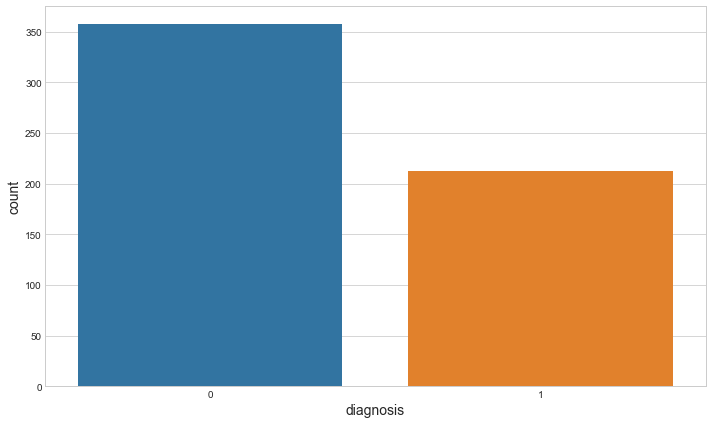

In [8]:
plt.figure(figsize=(10, 6));
sns.countplot(df['diagnosis']);plt.tight_layout()

In [9]:
def plot_bin(df,binary_column):
    float_columns = df.drop(binary_column, 1)
    arr_col = float_columns.columns
    
    for i, col_name in enumerate(arr_col):    
        plt.subplot(5,6, i + 1)
        
        tmp_0 = df[df[binary_column] == 0][col_name]
        tmp_1 = df[df[binary_column] == 1][col_name]
        sns.distplot(tmp_0,kde=True)
        plt.axvline(tmp_0.mean(),color='darkblue')
        sns.distplot(tmp_1,kde=True)
        plt.axvline(tmp_1.mean(),color='red')

        plt.tight_layout()

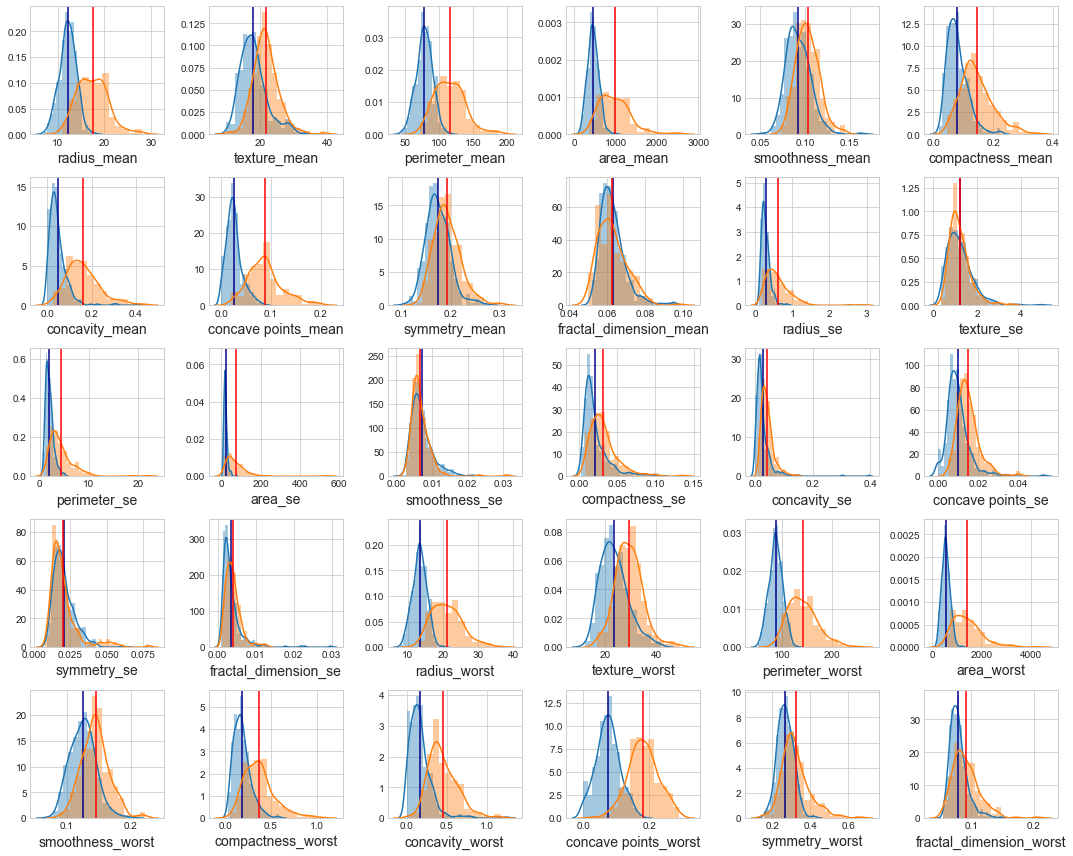

In [10]:
plot_bin(df,'diagnosis')

## 3. Estimando el porcentaje de overlap en los atributos

In [11]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound]
        )
    # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))
    return intersection

In [12]:
vals = []
for i in df.columns:
    x = histogram_overlap(df,i,'diagnosis',100)
    vals.append(x) 

In [13]:
dic_vals = dict(zip(df.columns,vals))

In [14]:
df_values = pd.DataFrame(dic_vals.items(), columns=['atributte', 'o_coef'])

In [15]:
df_values_sorted = df_values.sort_values(by='o_coef', ascending=False)

In [16]:
df_values_sorted = df_values_sorted.drop(df_values_sorted.index[-1], axis=0)

In [17]:
df_values_sorted

,atributte,o_coef
20,fractal_dimension_se,0.593838
15,smoothness_se,0.591036
10,fractal_dimension_mean,0.588235
19,symmetry_se,0.568627
12,texture_se,0.549020
16,compactness_se,0.523810
5,smoothness_mean,0.521008
9,symmetry_mean,0.509804
18,concave points_se,0.507003
30,fractal_dimension_worst,0.492997


## 4. Selección del modelo por GridSearchCV

In [18]:
y_vec = df['diagnosis']
X_mat = df.drop(['diagnosis'],1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_mat,y_vec, test_size=.33, random_state=1001)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 10, return_train_score=True)
grid_search.fit(X_train, y_train);

In [31]:
grid_search.best_estimator_

SVC(C=100, gamma=0.001)

In [32]:
grid_search.best_score_

0.9843454790823213

In [38]:
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

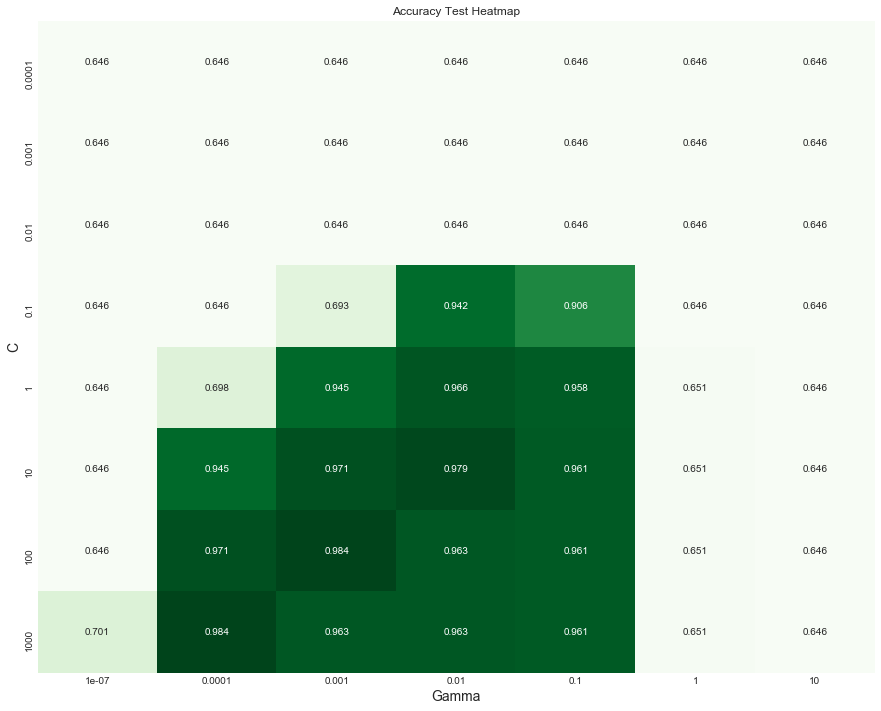

In [39]:
sns.heatmap(grid_search.cv_results_['mean_test_score'].reshape(8,7), annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range,
yticklabels=c_param_range, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Test Heatmap');

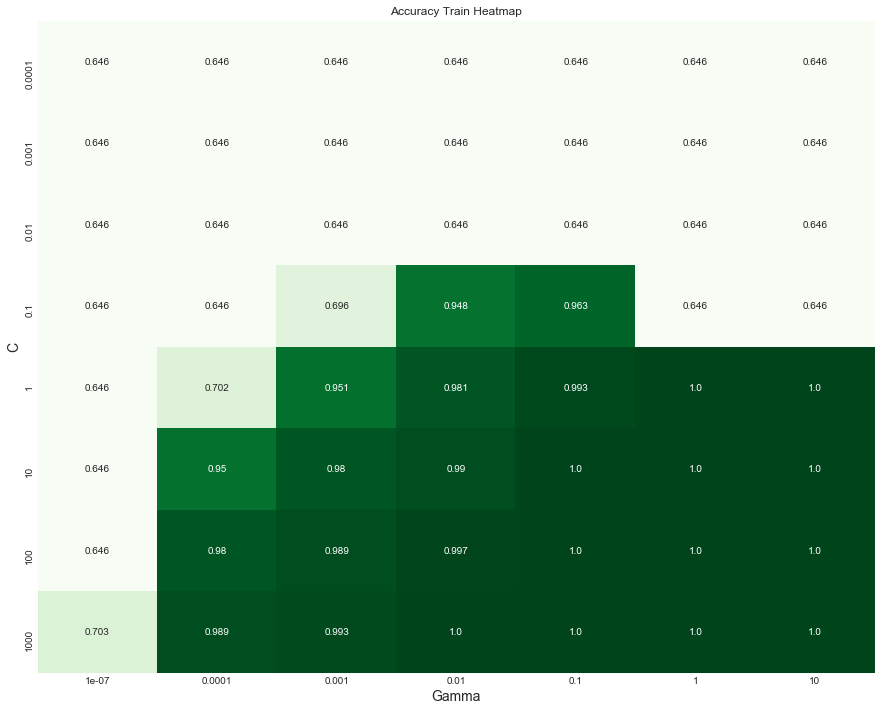

In [40]:
sns.heatmap(grid_search.cv_results_['mean_train_score'].reshape(8,7), annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range,
yticklabels=c_param_range, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Train Heatmap');

Se puede observar que hay una mejora importante en la accuracy del conjunto de datos.

Hay varios valores de 1, cuando los valores de Gamma y C son altos, lo cual indica un posible overfit del modelo, ya que esta encontrando el 100% de los valores, sin error.

In [37]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       111
           1       0.99      0.95      0.97        77

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



El modelo con los mejores estimadores, es bastante bueno, ya que sus valores de presicion y recall son cercanos a 1. Esto quiere decir que detecta casi todos lo valores Positivos y con escazos valores Falsos Positivos.

El valor de F1 score, también es altísimo, por lo tanto esto es un indicador de un buen desempeño del modelo.